In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
k = 1
eratio_min = 1/(1 + 2*k)
eratio_max = 1

In [6]:
def kn_cross_section(eratio: np.ndarray) -> np.ndarray:
    costheta = 1 - (1/eratio - 1) / k
    sin2theta = 1 - costheta ** 2
    return 0.5 * (eratio ** 2) * (eratio + 1/eratio - sin2theta)
    

In [7]:
scale = max(1 / (k * eratio_min**2), 1 / (k * eratio_max**2))


def sample_eratio(size: int):
    sample: list[float] = []
    for _ in range(size):
        while True:
            eratio_try = eratio_min + (eratio_max - eratio_min) * np.random.random()
            value = scale * np.random.random()
            if value < kn_cross_section(eratio_try) / (k * eratio_try**2):
                sample.append(eratio_try)
                break
    return np.array(sample)

In [8]:
eratio_sample = sample_eratio(100000)

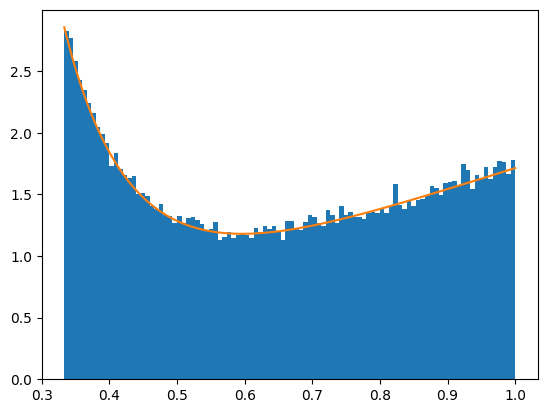

In [9]:
fig, ax = plt.subplots()

ax.hist(eratio_sample, bins=100, density=True)
eratio_linspace = np.linspace(eratio_min, eratio_max, 100)
eratio_pdf = kn_cross_section(eratio_linspace) / (k * eratio_linspace**2)
eratio_pdf /= np.sum(eratio_pdf) * (eratio_linspace[1] - eratio_linspace[0])
ax.plot(eratio_linspace, eratio_pdf)

In [10]:
costheta_sample = 1 - (1 / eratio_sample - 1) / k
theta_sample = np.arccos(costheta_sample)

In [11]:
def eratio_from_theta(theta):
    return 1 / (1 + k * (1 - np.cos(theta)))

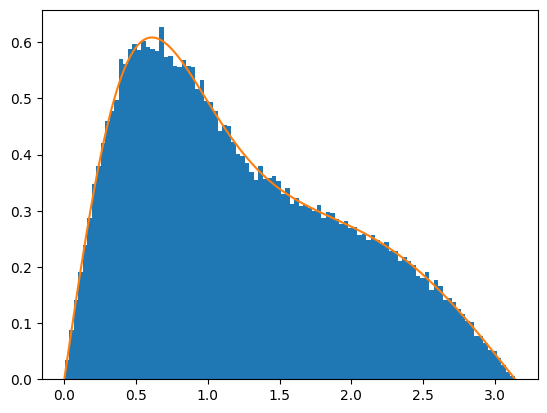

In [12]:
fig, ax = plt.subplots()

ax.hist(theta_sample, bins=100, density=True)
theta_linspace = np.linspace(0, np.pi, 1000)
eratio_from_theta_ = eratio_from_theta(theta_linspace)
theta_pdf = (
    0.5
    * (eratio_from_theta_**2)
    * (eratio_from_theta_ + 1 / eratio_from_theta_ - np.sin(theta_linspace) ** 2)
    * np.sin(theta_linspace)
)
theta_pdf /= np.sum(theta_pdf) * (theta_linspace[1] - theta_linspace[0])
ax.plot(theta_linspace, theta_pdf)

plt.show()

# 3D rotation debug

In [13]:
direction = np.array([1, -1, 1], dtype=float)
direction /= np.sqrt((direction**2).sum())

# rotation to this direction
sinalpha = - direction[2]
cosalpha = np.sqrt(1.0 - sinalpha**2)
cosphi = direction[0] / cosalpha
sinphi = direction[1] / cosalpha

print(f"{sinalpha = }")
print(f"{cosalpha = }")
print(f"{cosphi = }")
print(f"{sinphi = }")

sinalpha = -0.5773502691896258
cosalpha = 0.8164965809277259
cosphi = 0.7071067811865477
sinphi = -0.7071067811865477


In [14]:
local_phis = np.linspace(0, 2 * np.pi, 10)
local_thetas = 0.5 * np.ones_like(local_phis)
local_dir_x = np.cos(local_thetas)
local_dir_y = np.sin(local_thetas) * np.sin(local_phis)
local_dir_z = np.sin(local_thetas) * np.cos(local_phis)

In [15]:
turned_dir_x = (
    cosphi * cosalpha * local_dir_x
    - sinphi * local_dir_y
    + cosphi * sinalpha * local_dir_z
)
turned_dir_y = (
    sinphi * cosalpha * local_dir_x
    + cosphi * local_dir_y
    + sinphi * sinalpha * local_dir_z
)
turned_dir_z = - sinalpha * local_dir_x + cosalpha * local_dir_z

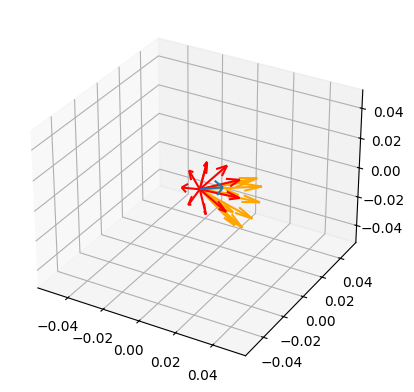

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.quiver([0], [0], [0], [direction[0]], [direction[1]], [direction[2]], length=0.05)
zeros = np.zeros_like(local_phis)
ax.quiver(zeros, zeros, zeros, local_dir_x, local_dir_y, local_dir_z, length=0.03, colors="orange")
ax.quiver(zeros, zeros, zeros, turned_dir_x, turned_dir_y, turned_dir_z, length=0.03, colors="red")

plt.show()